In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
sns.set()

In [8]:
import os
data_path = os.path.join(os.path.dirname(os.path.dirname(os.path.abspath(''))), "data", "prepared_data.csv")
df = pd.read_csv(data_path, index_col=0)
df.head()


,link,price,description_len,general_sq,floor,built,ceil,parking,time_to_underground,address,...,new_building,courtyard_view,road_view,district,rooms,wc_amount,joint_wc,balcony,living_square_ratio,placed_days_ago
0,https://www.cian.ru/sale/flat/258447697/,2280000.0,1623.0,11.4,4,1961.0,3.5,наземная,15.0,"Москва, ВАО, р-н Северное Измайлово, Сиреневый...",...,False,True,False,ВАО,1,1,True,0,0.500000,14
1,https://www.cian.ru/sale/flat/258452553/,2310000.0,1620.0,11.4,4,1961.0,3.5,наземная,15.0,"Москва, ВАО, р-н Северное Измайлово, Сиреневый...",...,False,True,False,ВАО,студия,1,True,0,0.500000,14
3,https://www.cian.ru/sale/flat/256222498/,2700000.0,1137.0,13.0,4,1980.0,4.0,наземная,15.0,"Москва, ВАО, р-н Северное Измайлово, Сиреневый...",...,False,False,True,ВАО,студия,1,True,0,0.500000,10
4,https://www.cian.ru/sale/flat/260273278/,2750000.0,380.0,18.0,2,1952.0,3.3,наземная,6.0,"Москва, НАО (Новомосковский), Щербинка, ул. Лю...",...,False,True,False,НАО (Новомосковский),1,1,True,0,0.888889,15
5,https://www.cian.ru/sale/flat/258740783/,2790000.0,1375.0,18.0,7,2021.0,2.8,наземная,12.0,"Москва, ЮВАО, р-н Нижегородский, Подъемная ул....",...,False,False,True,ЮВАО,студия,1,True,0,0.555556,16


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7696 entries, 0 to 9294
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   link                 7696 non-null   object 
 1   price                7696 non-null   float64
 2   description_len      7696 non-null   float64
 3   general_sq           7696 non-null   float64
 4   floor                7696 non-null   int64  
 5   built                7696 non-null   float64
 6   ceil                 7696 non-null   float64
 7   parking              7696 non-null   object 
 8   time_to_underground  7696 non-null   float64
 9   address              7696 non-null   object 
 10  offer_dt             7696 non-null   object 
 11  all_views            7696 non-null   float64
 12  today_views          7696 non-null   float64
 13  total_floors         7696 non-null   int64  
 14  apartments           7696 non-null   bool   
 15  new_building         7696 non-null   b

In [10]:
corr = df.corr()
corr.style.background_gradient()

,price,description_len,general_sq,floor,built,ceil,time_to_underground,all_views,today_views,total_floors,apartments,new_building,courtyard_view,road_view,wc_amount,joint_wc,balcony,living_square_ratio,placed_days_ago
price,1.000000,-0.152449,0.558680,0.110395,-0.124086,-0.175946,-0.146459,-0.139212,-0.290798,0.133961,-0.343184,-0.075148,0.105886,0.018456,0.054908,-0.170095,0.179213,-0.154625,0.045888
description_len,-0.152449,1.000000,0.058244,0.088293,0.146687,0.085607,0.132908,-0.096437,-0.107276,0.142797,0.067685,0.461380,-0.211734,0.028622,0.078219,0.142510,-0.148606,-0.129286,-0.209699
general_sq,0.558680,0.058244,1.000000,-0.049900,0.009761,-0.117947,0.310561,-0.044512,-0.101493,-0.079087,-0.296430,-0.001634,0.017989,0.029518,0.217512,-0.261627,0.292640,-0.163963,0.034146
floor,0.110395,0.088293,-0.049900,1.000000,0.204473,-0.023118,-0.072903,-0.104385,-0.117445,0.513658,-0.073998,0.246225,-0.082177,0.039521,-0.032727,0.111912,0.029311,-0.174465,-0.047381
built,-0.124086,0.146687,0.009761,0.204473,1.000000,0.139895,0.090911,-0.066386,-0.066160,0.294374,0.097944,0.135461,-0.121013,0.060727,0.030773,0.099898,0.004027,-0.179354,-0.062052
ceil,-0.175946,0.085607,-0.117947,-0.023118,0.139895,1.000000,-0.008989,0.017489,0.085682,-0.022639,0.274481,0.096966,-0.055945,0.029595,0.055818,0.097436,-0.124831,-0.032146,-0.086368
time_to_underground,-0.146459,0.132908,0.310561,-0.072903,0.090911,-0.008989,1.000000,-0.052216,-0.053525,-0.147006,-0.165474,0.032648,-0.070873,-0.004778,0.084888,-0.074121,0.167581,-0.042283,-0.034132
all_views,-0.139212,-0.096437,-0.044512,-0.104385,-0.066386,0.017489,-0.052216,1.000000,0.311481,-0.144822,0.152244,-0.169893,0.049586,0.022753,-0.005745,-0.052724,-0.013364,0.135641,0.142897
today_views,-0.290798,-0.107276,-0.101493,-0.117445,-0.066160,0.085682,-0.053525,0.311481,1.000000,-0.176205,0.149370,-0.218176,0.056652,0.001991,-0.010515,-0.036196,-0.011965,0.146044,0.010540
total_floors,0.133961,0.142797,-0.079087,0.513658,0.294374,-0.022639,-0.147006,-0.144822,-0.176205,1.000000,-0.076449,0.422514,-0.151226,0.006301,-0.041266,0.128226,-0.126694,-0.276325,-0.094011


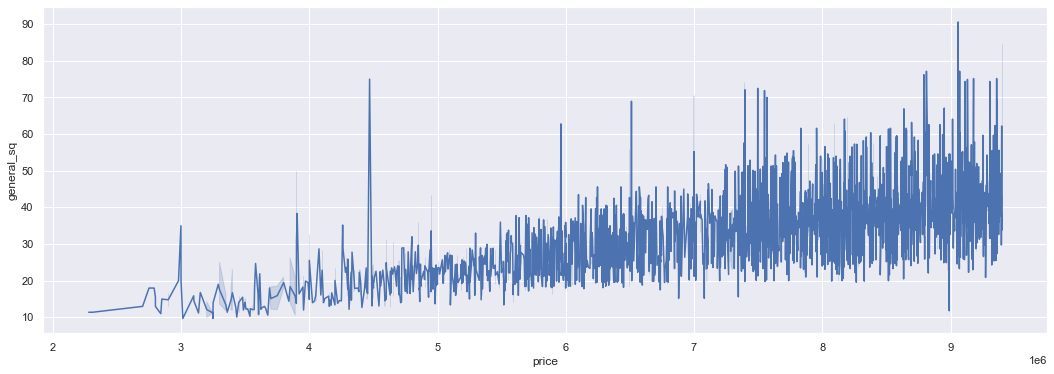

In [11]:
plt.figure(figsize=(18, 6))
sns.lineplot(data=df, x=df['price'], y=df['general_sq']);

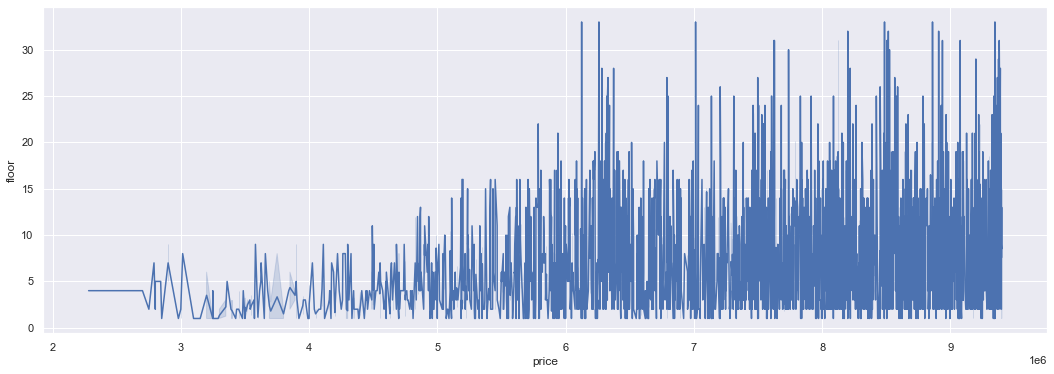

In [12]:
plt.figure(figsize=(18, 6))
sns.lineplot(data=df, x=df['price'], y=df['floor']);

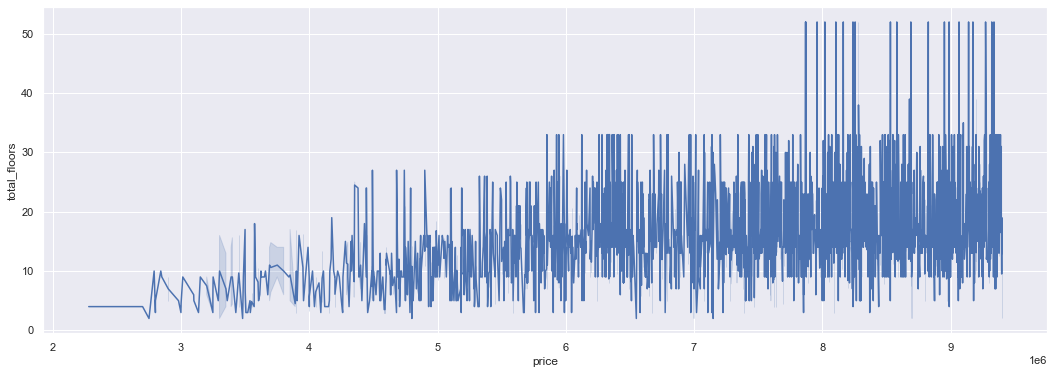

In [13]:
plt.figure(figsize=(18, 6))
sns.lineplot(data=df, x=df['price'], y=df['total_floors']);

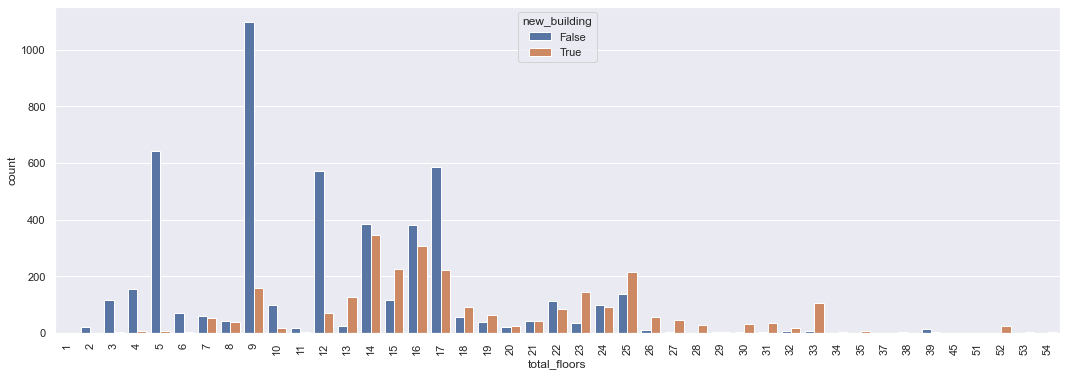

In [14]:
plt.figure(figsize=(18, 6))
general_sq_cnt_plt = sns.countplot(x=df['total_floors'], hue=df['new_building'])
general_sq_cnt_plt.set_xticklabels(general_sq_cnt_plt.get_xticklabels(), rotation=90);

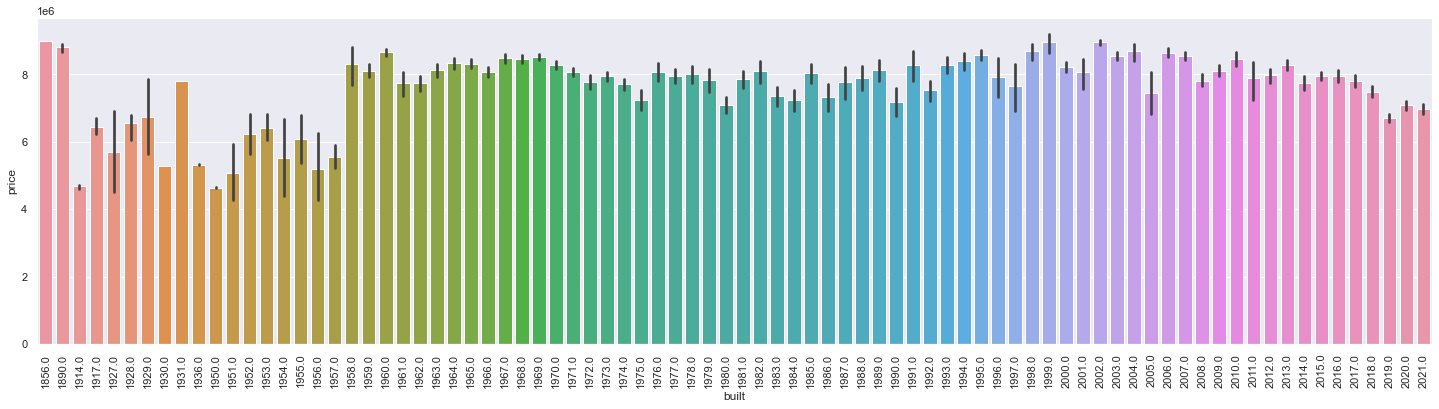

In [15]:
plt.figure(figsize=(25, 6))
bar_plot = sns.barplot(data=df, x="built", y="price")
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=90);

In [16]:
rounded = df['general_sq'].round()

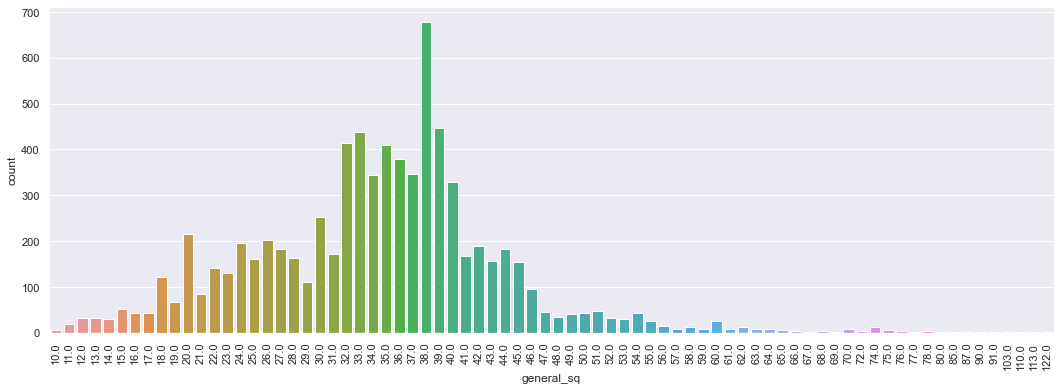

In [17]:
plt.figure(figsize=(18, 6))
general_sq_cnt_plt = sns.countplot(x=rounded)
general_sq_cnt_plt.set_xticklabels(general_sq_cnt_plt.get_xticklabels(), rotation=90);

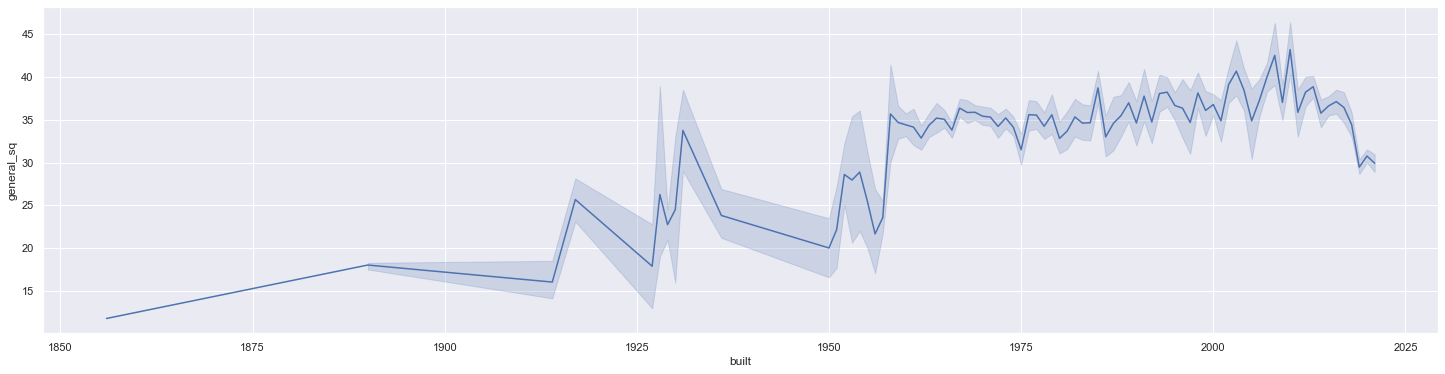

In [18]:
plt.figure(figsize=(25, 6))
sns.lineplot(data=df, x="built", y="general_sq");

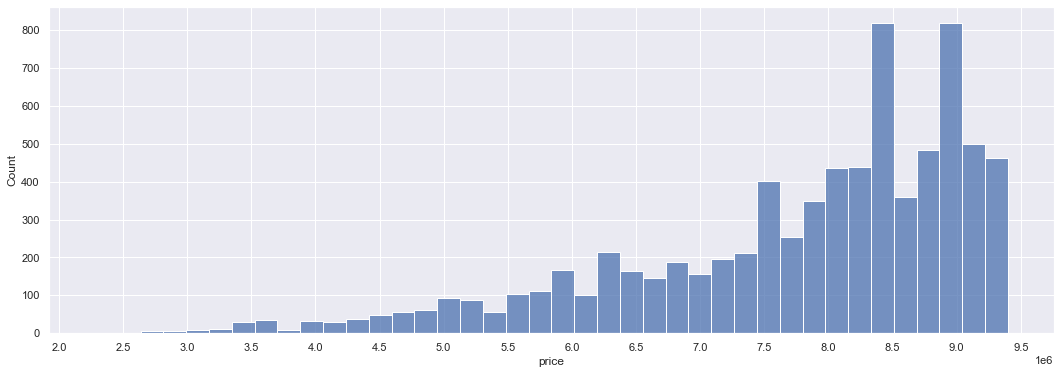

In [19]:
fig = plt.figure(figsize=(18, 6))
sns.histplot(df['price']);
fig.axes[0].xaxis.set_major_locator(mpl.ticker.MultipleLocator(0.5*10**6))

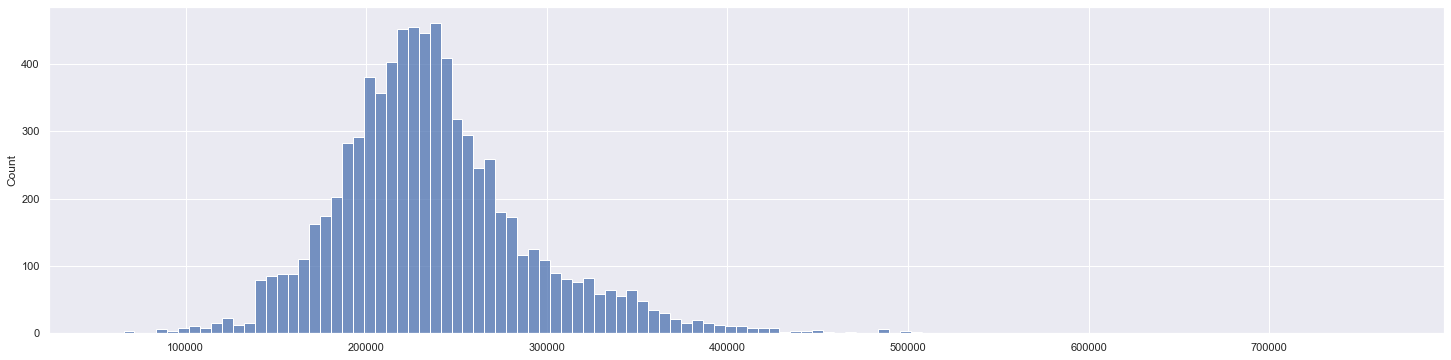

In [21]:
plt.figure(figsize=(25, 6))
sq_meter_price = df['price'] / df['general_sq']
sns.histplot(sq_meter_price);

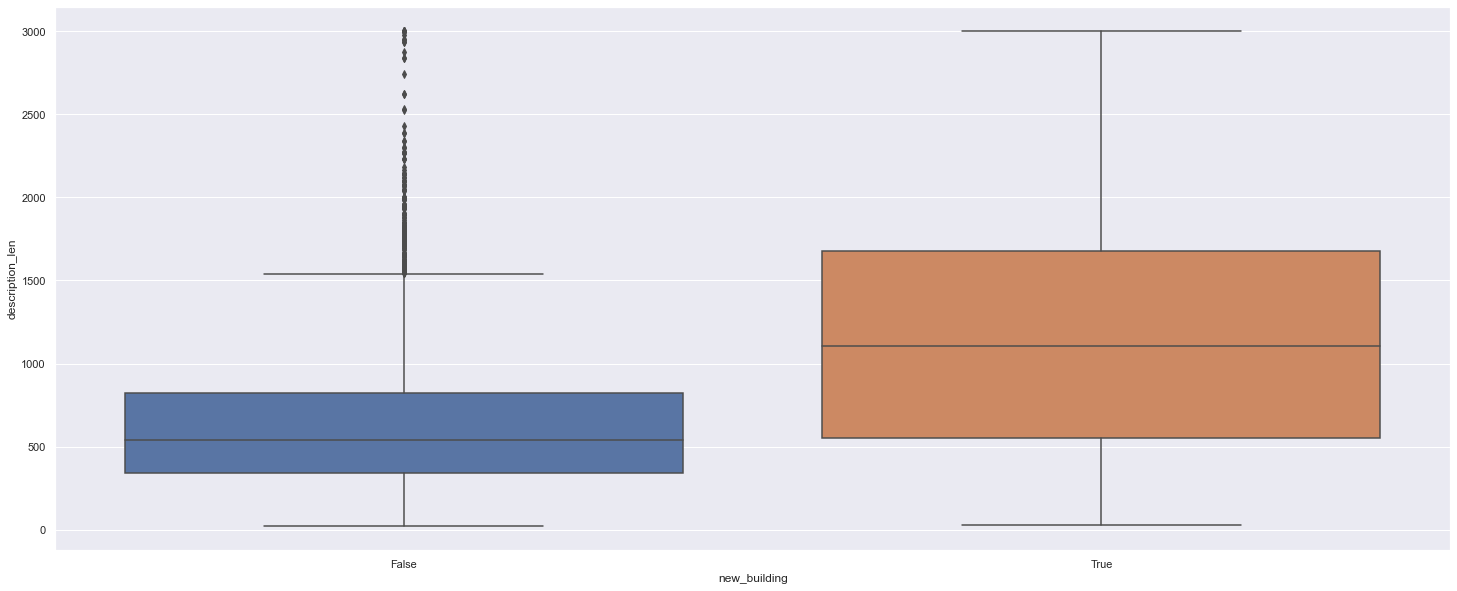

In [22]:
plt.figure(figsize=(25, 10))
sns.boxplot(data=df, x="new_building", y="description_len");

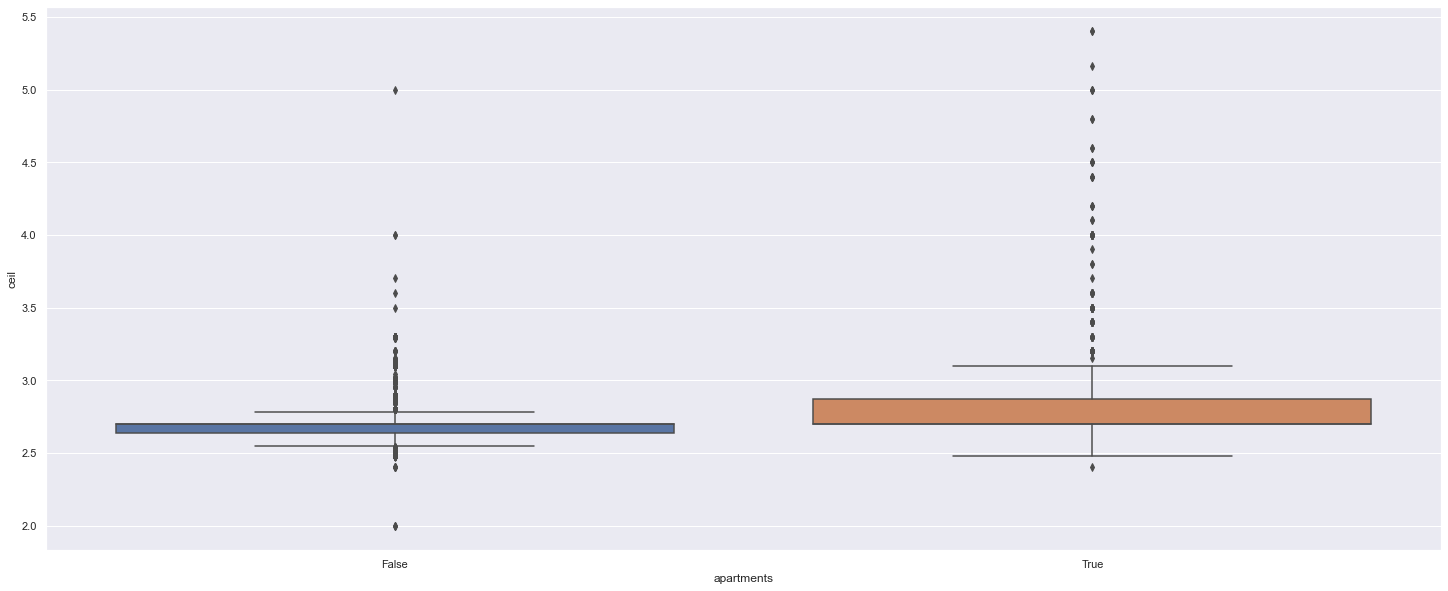

In [23]:
plt.figure(figsize=(25, 10))
sns.boxplot(data=df, x="apartments", y="ceil");

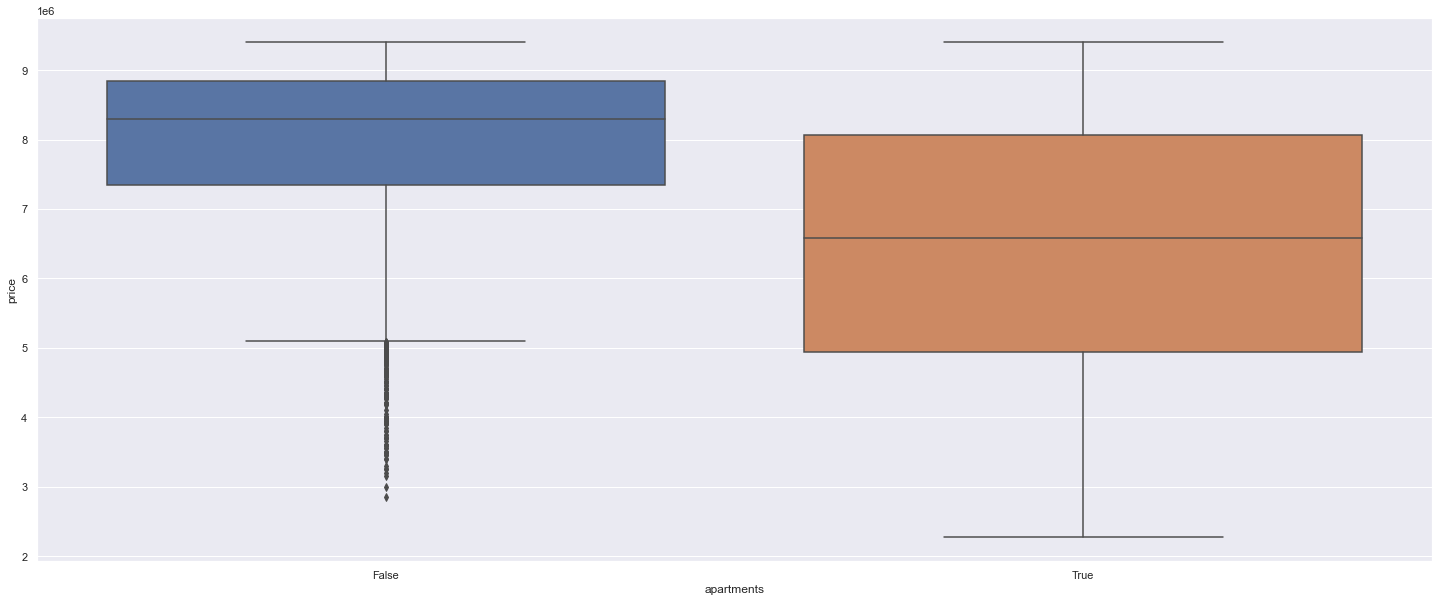

In [24]:
plt.figure(figsize=(25, 10))
sns.boxplot(data=df, x="apartments", y="price");

<Figure size 1800x576 with 0 Axes>

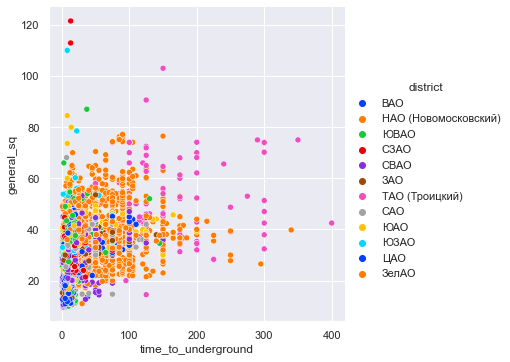

In [25]:
plt.figure(figsize=(25,8));
sns.relplot(data=df, x='time_to_underground', y='general_sq', hue='district', palette='bright');

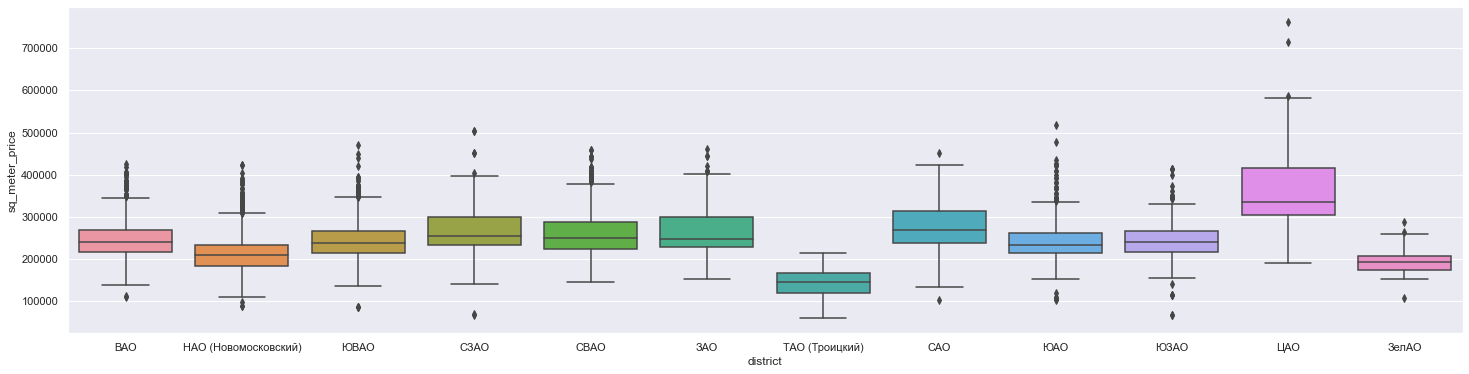

In [26]:
plt.figure(figsize=(25, 6))
sq_meter_price = df['price'] / df['general_sq']
df['sq_meter_price'] = sq_meter_price
sns.boxplot(x='district', y='sq_meter_price', data=df);

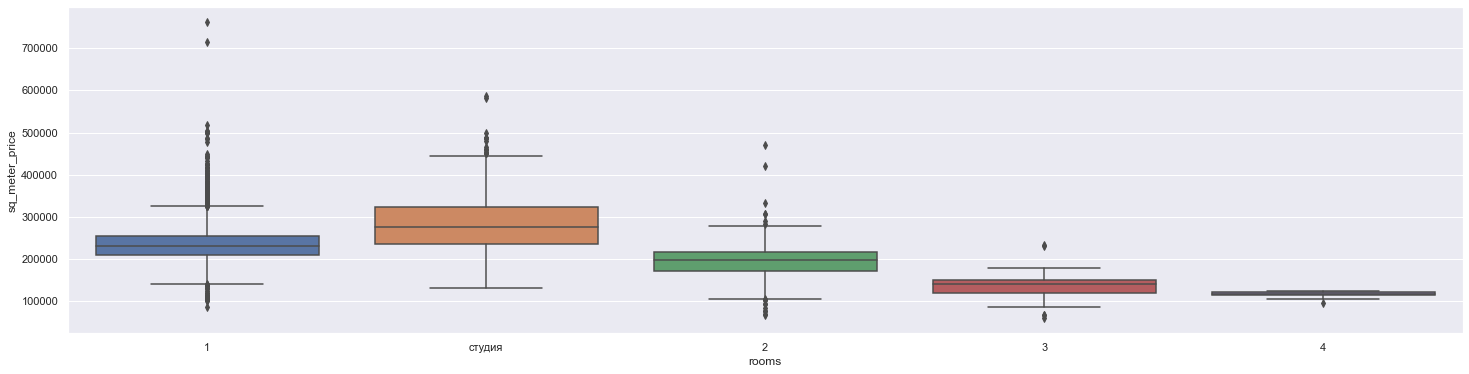

In [27]:
plt.figure(figsize=(25, 6))
sq_meter_price = df['price'] / df['general_sq']
df['sq_meter_price'] = sq_meter_price
sns.boxplot(x='rooms', y='sq_meter_price', data=df);

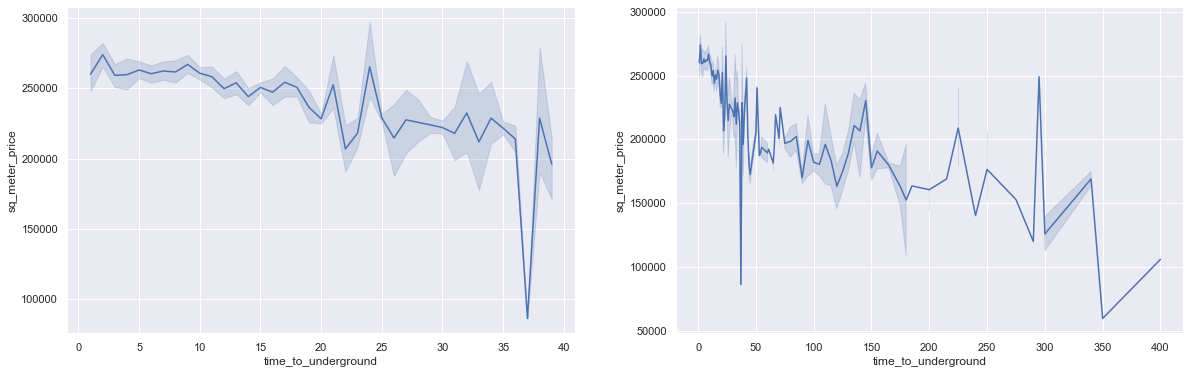

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

sns.lineplot(x='time_to_underground', y='sq_meter_price', data=df[df['time_to_underground'] < 40], ax=axes[0]);
sns.lineplot(x='time_to_underground', y='sq_meter_price', data=df, ax=axes[1]);

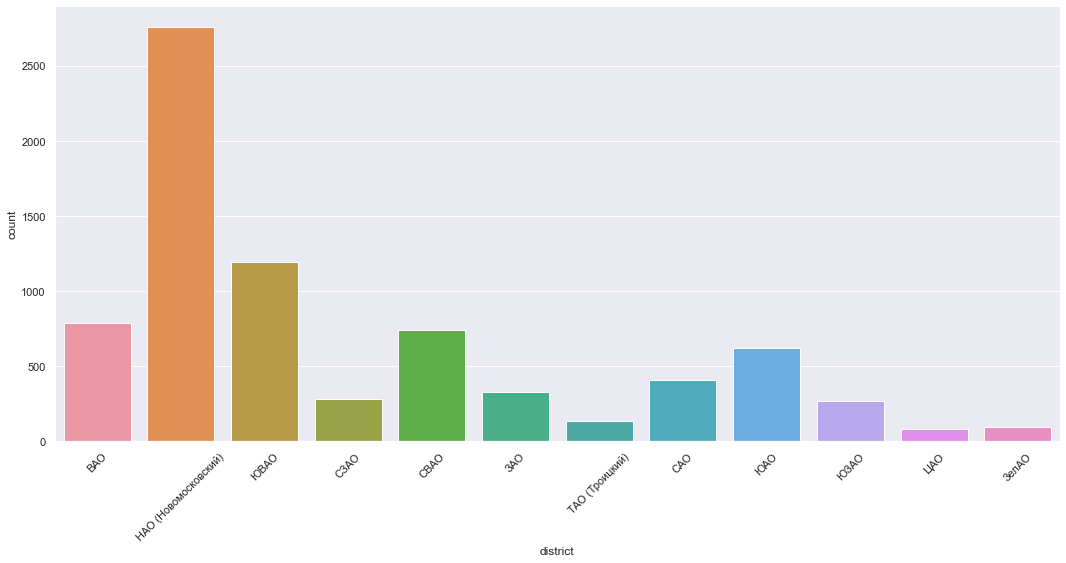

In [29]:
fig = plt.figure(figsize=(18, 8))
sns.countplot(data=df, x='district')
ax = fig.axes[0]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

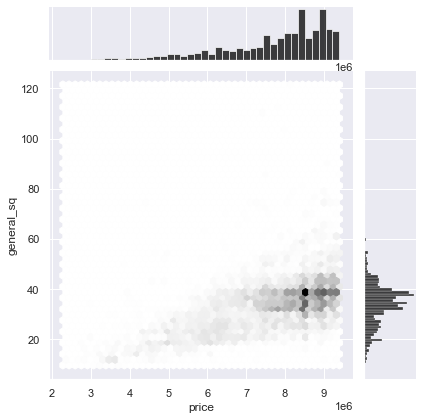

In [30]:
with plt.style.context('seaborn-dark-palette'):
    sns.jointplot(x='price', y='general_sq', data=df, kind='hex', color='black')
